In [41]:
# Importing all importient library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#ml
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score


<a href="https://www.kaggle.com/lourenswalters/i-breast-cancer-screening-with-mammography">LINK</a> 

### Importing dataset 

In [2]:
df = pd.read_csv('Cleaned_data.csv')

In [3]:
df

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
...,...,...,...,...,...,...
825,4,47,2,1,3,0
826,4,56,4,5,3,1
827,4,64,4,5,3,0
828,5,66,4,5,3,1


In [4]:
df.shape

(830, 6)

In [5]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


In [6]:
df_mam = df.copy()

### Counting the number of values

In [7]:
df_mam['Shape'].value_counts()

4    379
1    190
2    180
3     81
Name: Shape, dtype: int64

In [8]:
df_mam['Margin'].value_counts()

1    320
4    254
5    127
3    106
2     23
Name: Margin, dtype: int64

In [9]:
df_mam['BI-RADS'].value_counts()

4     468
5     316
3      24
6       9
2       7
0       5
55      1
Name: BI-RADS, dtype: int64

### Describeing the data ast

In [10]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [11]:
df.isna().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [12]:
# Rename columns to align with our data dictionary.
df_mam = df_mam.rename(columns = {'BI-RADS': 'score', 'Age': 'age', 'Shape': 'shape', 'Margin': 'margin', 'Density':
    'density', 'Severity': 'malignanttrue'})
df_mam_orig = df_mam.copy()

categorical_cols = ['shape', 'margin']
df_mam = pd.get_dummies(df_mam, columns = categorical_cols, drop_first=True)
cols = list(df_mam.columns.values)
quantitative_cols = ['score', 'shape', 'margin', 'density']

# Re-order columns
col_names = ['malignanttrue', 'score', 'age', 'shape_2', 'shape_3', 'shape_4', 'margin_2', 'margin_3', 'margin_4','margin_5', 'density']
df_mam = df_mam[col_names]

In [13]:
df_mam['score'].value_counts()

4     468
5     316
3      24
6       9
2       7
0       5
55      1
Name: score, dtype: int64

In [14]:
df_mam.sample(10, random_state=0)

,malignanttrue,score,age,shape_2,shape_3,shape_4,margin_2,margin_3,margin_4,margin_5,density
647,0,4,68,0,0,1,0,0,1,0,3
31,0,4,74,1,0,0,0,0,0,0,2
474,1,4,59,0,0,1,0,0,1,0,3
8,0,4,54,0,0,0,0,0,0,0,3
382,0,4,37,1,0,0,0,1,0,0,3
255,1,5,87,0,0,1,0,0,1,0,3
672,1,0,72,0,0,1,0,1,0,0,3
679,1,5,62,0,0,1,0,0,1,0,2
196,1,5,66,0,0,1,0,0,1,0,3
652,0,4,58,0,0,0,0,0,0,0,3


## Continuous density plot

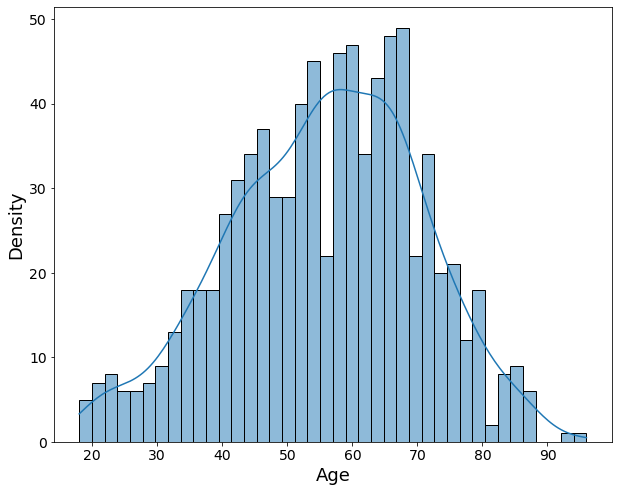

In [15]:

fig_missing, axes = plt.subplots(1, 1, figsize=(10, 8))

# Plot frequency plot/ histogram
_ = sns.histplot(x="age", kde=True, data=df_mam, ax=axes, bins=40);
_ = axes.set(xlabel="Age", ylabel='Density');
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
axes.tick_params('y', labelsize = 14);
axes.tick_params('x', labelsize = 14);

In [16]:
idx = df_mam[df_mam['score'] == 55].index
df_mam.loc[idx, 'score'] = 5

In [17]:
df_mam['score'].value_counts()

4    468
5    317
3     24
6      9
2      7
0      5
Name: score, dtype: int64

In [18]:
df_mam = df_mam.sort_values(['age', 'score', 'density', 'malignanttrue'], ascending=[True, True, True, True])
df_mam = df_mam.reset_index(drop=True)

## Finding the percentage in malignanttrue column

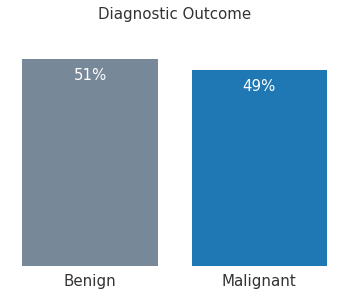

In [19]:
_ = plt.figure()

# Plot outcome counts.a
outcome_counts = df_mam_orig['malignanttrue'].value_counts(normalize = True)
legend_labels = ['Benign', 'Malignant']

# change the background bar colors to be light grey
bars = plt.bar(outcome_counts.index, outcome_counts.values, align='center', linewidth=0,
               color='lightslategrey')
# make one bar, the survived bar, a contrasting color
bars[1].set_color('#1F77B4')

# soften all labels by turning grey
_ = plt.xticks(outcome_counts.index, legend_labels, fontsize=15, alpha=0.8)
_ = plt.title('Diagnostic Outcome', fontsize=15, pad=30, alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False,
                labelbottom=True)

# Remove the frame - my method
ax = plt.gca()
ax.set_frame_on(False)

# Remove the frame of the chart - instructor's method
#for spine in plt.gca().spines.values():
#    spine.set_visible(False)

# direct label each bar with Y axis values
for bar in bars:
    _ = plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05,
                       str(round((bar.get_height()*100))) + '%', ha='center', color='w',
                       fontsize=15)

plt.show()

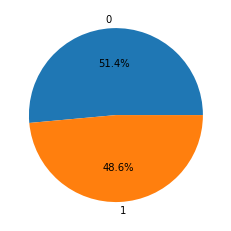

In [20]:
from matplotlib.pyplot import pie
sums = df_mam_orig.groupby(df_mam_orig["malignanttrue"])["malignanttrue"].count()
pie(sums, labels=sums.index,autopct='%1.1f%%')
plt.show()


In [21]:
df_mam['malignanttrue'].value_counts()

0    427
1    403
Name: malignanttrue, dtype: int64

## Bar chart plot of categorical variables.

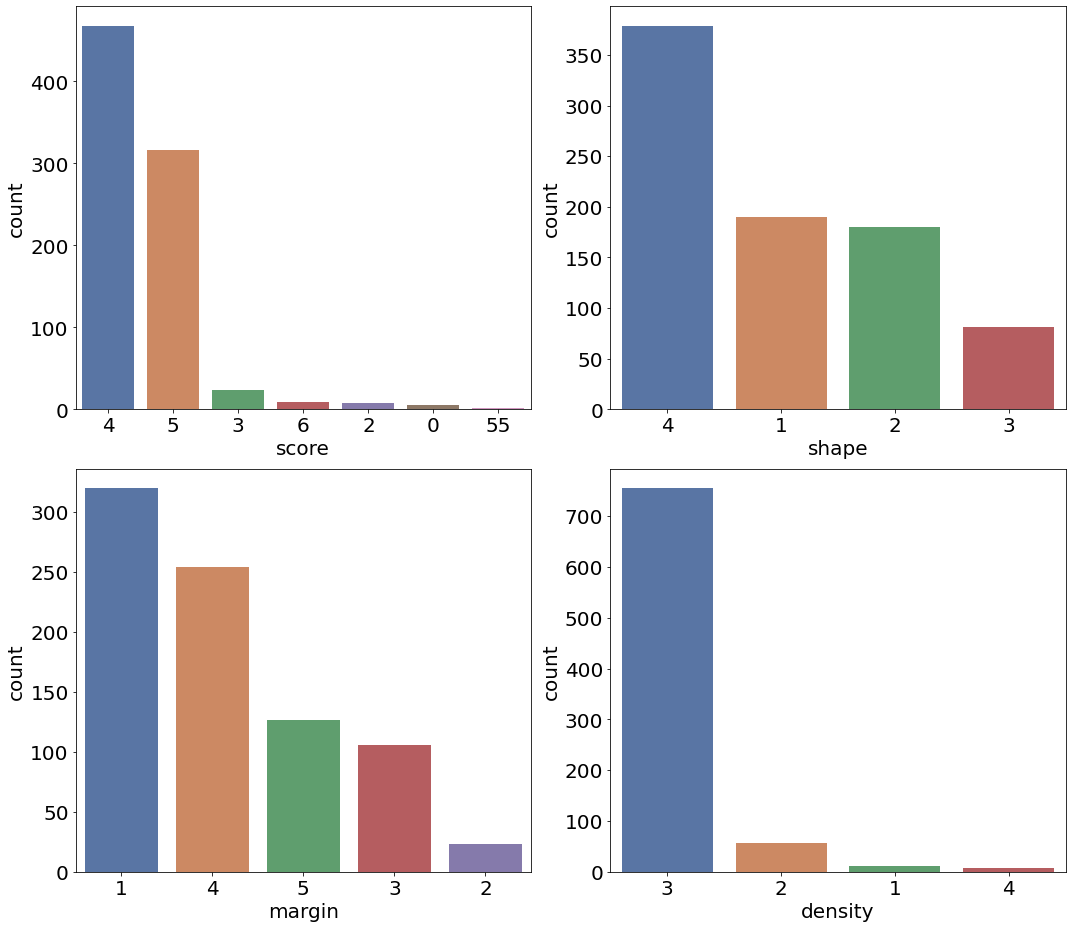

In [22]:

fig, ax = plt.subplots(2, 2, figsize=(15, 13));
for variable, subplot in zip(quantitative_cols, ax.flatten()):
    subplot.xaxis.label.set_size(20)
    subplot.yaxis.label.set_size(20)
    subplot.tick_params('y', labelsize = 20);
    subplot.tick_params('x', labelsize = 20);
    cp = sns.countplot(x=df_mam_orig[variable], ax=subplot, palette='deep', order =
    df_mam_orig[variable].value_counts().index);
plt.tight_layout()

## Declaring X and Y 

In [23]:
X = df_mam.iloc[:, np.r_[1:11]]
y = df_mam.iloc[:, 0]

In [33]:
X

,score,age,shape_2,shape_3,shape_4,margin_2,margin_3,margin_4,margin_5,density
0,4,18,0,0,0,0,0,0,0,3
1,4,19,0,0,0,0,0,0,0,3
2,4,19,0,0,0,0,0,0,0,3
3,4,19,0,1,0,0,0,0,0,3
4,4,19,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
825,5,87,0,0,1,0,0,0,1,3
826,5,87,0,0,1,0,0,1,0,3
827,4,88,0,0,1,0,0,1,0,3
828,5,93,0,0,0,0,0,0,1,3


In [34]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

## Spleating the data ast

In [24]:
y = np.ravel(y)

# Split the data into the training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Scaling the data ase

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [26]:
col_names = list(X.columns.values)
X_train = pd.DataFrame(X_train, columns=col_names)

In [27]:
X_train.head()

,score,age,shape_2,shape_3,shape_4,margin_2,margin_3,margin_4,margin_5,density
0,0.991644,0.085514,-0.506523,-0.326744,1.098032,-0.172631,-0.364649,1.490905,-0.432461,0.256124
1,0.991644,-0.680308,-0.506523,-0.326744,1.098032,-0.172631,2.742362,-0.670734,-0.432461,0.256124
2,-0.449484,-1.237269,1.974244,-0.326744,-0.910720,-0.172631,-0.364649,-0.670734,-0.432461,-2.640410
3,0.991644,0.572855,-0.506523,-0.326744,1.098032,-0.172631,-0.364649,1.490905,-0.432461,0.256124
4,-0.449484,-0.332207,-0.506523,-0.326744,1.098032,-0.172631,2.742362,-0.670734,-0.432461,0.256124


# Logistic Regression

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_lr = logreg.predict(X_test)
acc_log = round(logreg.score(X_test,y_test) * 100, 2)
print("Logistic Regression Accuracy: ", acc_log)

Logistic Regression Accuracy:  85.1


# K - Nearest Neighbours

In [38]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
print("K - Nearest Neighbours Accuracy: ", acc_knn)

K - Nearest Neighbours Accuracy:  81.25


# RandomForestClassifier

In [39]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test,y_test) * 100, 2)
print("Random Forest Accuracy: ", acc_random_forest)

Random Forest Accuracy:  79.81


# Support Vector Machines

In [40]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_svm = svc.predict(X_test)
acc_svc = round(svc.score(X_test,y_test) * 100, 2)
print("Support Vector Machines Accuracy: ", acc_svc)

Support Vector Machines Accuracy:  85.58


# Gaussian Naive Bayes

In [42]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred_gnb = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test,y_test) * 100, 2)
print("Gaussian Naive Bayes Accuracy: ", acc_gaussian)

Gaussian Naive Bayes Accuracy:  82.21


In [45]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'RandoneForestClassifier', 'SVC','Gaussian Naive Bayes'],
    'Score' : [acc_log, acc_random_forest, acc_svc,acc_gaussian]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVC,85.58
0,Logistic Regression,85.10
3,Gaussian Naive Bayes,82.21
1,RandoneForestClassifier,79.81


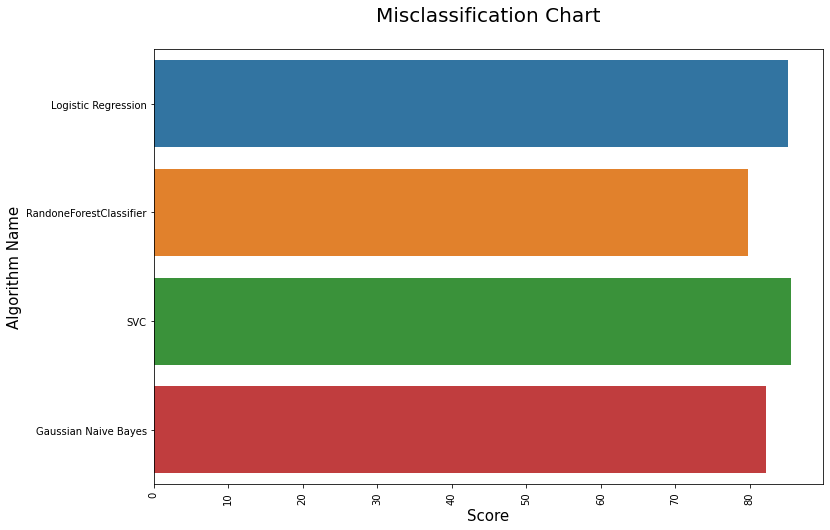

In [59]:
plt.figure(figsize=(12, 8))
splot=sns.barplot(y="Model",x="Score",data=models)


plt.xticks(rotation=90)

plt.title("Misclassification Chart\n", fontsize = 20)
plt.ylabel("Algorithm Name", fontsize = 15)
plt.xlabel("Score", fontsize = 15)

plt.show()

<center><h1>The End</h1></center>
